In [1]:
import os
import glob
import numpy as np
from platform import system as OS
import pandas as pd
import scipy.stats
import math
from shutil import copy, rmtree
import matplotlib
import datetime
from copy import deepcopy
from IPython.display import clear_output, display, HTML, Image
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
import sys, logging
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D

if "__file__" not in dir():

    root='/data'

    ThisNoteBookPath=os.path.dirname(os.path.realpath("__file__"))
    CommunNoteBookesPath=os.path.join(os.path.split(ThisNoteBookPath)[0],"load_preprocess_rat")
    CWD=os.getcwd()
    os.chdir(CommunNoteBookesPath)   
    %run Animal_Tags.ipynb
    %run UtilityTools.ipynb
    %run BatchRatBehavior.ipynb
    %run loadRat_documentation.ipynb
    %run plotRat_documentation_1_GeneralBehavior.ipynb
    %run plotRat_documentation_3_KinematicsInvestigation.ipynb
    %run Animal_Tags.ipynb
    %run RunBatchRat_3_CompareGroups.ipynb
    %run Lesion_Size.ipynb

    os.chdir(CWD)

    defaultParam={
        "binSize":0.25,
        "trialOffset":20., #max end of trial, in seconds (position will be cutted)
        "sigmaSmoothPosition":0.1,  #smooth the position
        #"sigmaSmoothPosition":0.33 for pavel dataType
        "sigmaSmoothSpeed":0.3, #smooth the speed
        "positionDiffRange": [2.,5.], #min and max differences allowed between two consecutive positions
                                      #min to correct start, max to correct jumps
        "pawFrequencyRange":[2.,10.],
        "startAnalysisParams":[10,0.2,0.5],
        "cameraToTreadmillDelay":2., #seconds, usual time between camera start and treadmill start
        "nbJumpMax" : 100., #if jumps>nbJumpMax, trial is badly tracked

        #parameter to detect end of trial (first position minima)
        "endTrial_backPos":55,  # minima is after the animal went once to the back (after first time position>backPos)
        "endTrial_frontPos":30, # minima's position is in front of treadmill (position[end]<frontPos)
        "endTrial_minTimeSec":4, # minima is after minTimeSec seconds (time[end]>minTimeSec)
        }
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 15}

In [2]:
if "__file__" not in dir():
    
    #Define desired profile dictionary
    AnimalProfile={'Type':'Good',
         'rewardType':'Progressive',
         'initialSpeed':['10'],
         'Speed':'10',
         'Tag':['Early-Lesion_DMS','Early-Lesion_DLS','Early-Lesion_DS']
                  }

    animalList=batch_get_animal_list(root,AnimalProfile)
    
    PerfParamToPlot =["median entrance time (sec)","percentile entrance time","% good trials",'standard deviation of entrance time',"% good trials on last 40",
                      "Trajectory Correlation","Mean Pairwise RMSE","Forward Speed Vs TreadmillSpeed","Tortuosity","Run Distance"
                      ,"Delivered Reward Ratio","mean entrance time (sec)"]

    PerfParamToPlot =["Forward Speed"]
    
    profile={'Type':'Good'}#AnimalProfile
    # this is where you define a list of functions you want to run on your data (usually, don't touch!)
    plotFunctionList=[]
    print("animals that will be analyzed: %s"%animalList)
    
    behav, loc, size, animals= early_lesion_size_control(root,PerfParamToPlot,AnimalProfile)


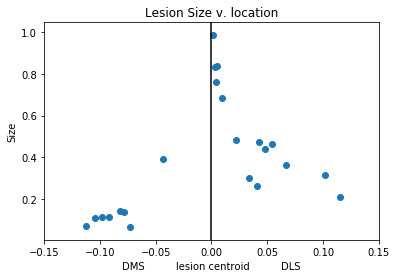

In [3]:
if "__file__" not in dir():
    ax=plt.subplot(111)
    sc=ax.scatter(loc,size)
    ax.set_ylabel('Size')
    ax.set_xlabel('DMS          lesion centroid          DLS')
    ax.set_title('Lesion Size v. location');
    ax.axvline(0,color='k');
    ax.set_xlim([-.15,.15])

#     for i, txt in enumerate(animals):
#         ax.annotate(txt[-3:], (loc[i], size[i]))

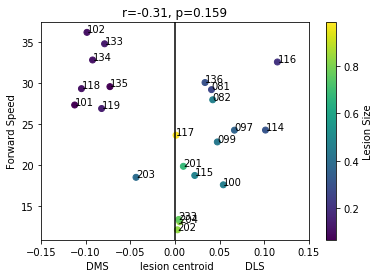

In [4]:
if "__file__" not in dir():
    cm = plt.cm.get_cmap('viridis')
    ax=plt.subplot(111)
    sc=ax.scatter(loc,behav,c=size,cmap=cm)
    ax.set_ylabel(PerfParamToPlot[0])
    ax.set_xlabel('DMS          lesion centroid          DLS')
    ax.set_title('r='+str(np.corrcoef(behav,loc)[0,1])[:5]+', p='+str(scipy.stats.pearsonr(behav,loc)[1])[:5]);
    ax.axvline(0,color='k');
    ax.set_xlim([-.15,.15])
    cbAx=plt.colorbar(sc,ax=ax);
    cbAx.set_label("Lesion Size")

    for i, txt in enumerate(animals):
        ax.annotate(txt[-3:], (loc[i], behav[i]))

### Late

In [ ]:
if "__file__" not in dir():
    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':['0','10'],
             'Speed':'10',
             'Tag':['Control','Control-AfterBreak','Control-Late-NoTimeout-BackToTimeout',
                    'Control-NoTimeout-Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':['0','10'],
             'Speed':'10',
             'Tag':['Late-Lesion_DMS','Late-Lesion_DLS','Late-Lesion_DS']
             }
    
    _,sessionDic=event_detect(root,profile1,profile2)
    
    PerfParamToPlot =["median entrance time (sec)","percentile entrance time","% good trials",
                      'standard deviation of entrance time',"% good trials on last 40",
                      "Trajectory Correlation","Mean Pairwise RMSE","Forward Speed Vs TreadmillSpeed",
                      "Tortuosity","Run Distance","Delivered Reward Ratio","mean entrance time (sec)"]

    PerfParamToPlot=['Forward Speed']
    
    profile={'Type':'Good'}#AnimalProfile
    # this is where you define a list of functions you want to run on your data (usually, don't touch!)
    plotFunctionList=[]

    
    Behav, Loc, Size, Animals=late_lesion_size_control(root,PerfParamToPlot,profile1,profile2,Ndays=5)

In [ ]:
if "__file__" not in dir():
    cm = plt.cm.get_cmap('viridis')
    ax=plt.subplot(111)
    sc=ax.scatter(Loc,Behav,c=Size,cmap=cm)
    ax.set_ylabel(PerfParamToPlot[0])
    ax.set_xlabel('DMS          lesion centroid          DLS')
    ax.set_title('r='+str(np.corrcoef(Behav,Loc)[0,1])[:5]+', p='+str(scipy.stats.pearsonr(Behav,Loc)[1])[:5]);
    ax.axvline(0,color='k');
    ax.axhline(0,color='k');
    ax.set_xlim([-.15,.15]);
    cbAx=plt.colorbar(sc,ax=ax);
    cbAx.set_label("Lesion Size");

#     for i, txt in enumerate(Animals):
#         ax.annotate(txt[-3:], (Loc[i], Behav[i]))